In [6]:
#import necessary libraries
import numpy as np
import scipy as sc

In [9]:
# Define the coefficient matrix A
A= np.array ([[1,3,5],[2,5,1],[2,3,8]]) #remember there is a bracket outside the list 
print (A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [10]:
# Define the right hand side vector b
b= np.array ([[10],[8],[3]])
print (b)

[[10]
 [ 8]
 [ 3]]


In [11]:
#Calculate the inverse of A and multiply with b to find the solution of vector
C= sc.linalg.inv(A).dot(b) #linalg means linear algebra
print (C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


Example 2

In [12]:
import numpy as np
from scipy.linalg import solve

In [14]:
#Define coefficient matrix A
A=np.array([[3,2],[1,2]])
#Define vector b
b=np.array([[1],[0]])
#Calculate inverse os A and multiply to b
C= sc.linalg.inv(A).dot(b)
print (C)


[[ 0.5 ]
 [-0.25]]


In [20]:
#Define coefficient matrix A
A=np.array([[3,2],[1,2]])
#Define vector b
b=np.array([[1],[0]])
#another method
solution= sc.linalg.solve(A,b)
print(solution)

[[ 0.5 ]
 [-0.25]]


Runge-Kutta Method

In [21]:
def dydx(x,y):
    return ((x-y)/2)

In [60]:
#find y value for given x using stepsize h
def rungekutta (x0,y0,x,h):
    n = int((x-x0)/h)
    y = y0
    for i in range (1,n+1): #to define it start from teh iteration from 1
        k1 = dydx(x0,y)
        k2 = dydx(x0+0.5*h,y+0.5*h*k1)
        k3 = dydx(x0+0.5*h,y+0.5*h*k2)
        k4 = dydx(x0+h,y+h*k3)
#update next value of y
        y = y+(1/6)*h*(k1+2*k2+2*k3+k4)
        x0 = x0+h
    return y
# list conditions
x0 = 0
y0 = 1
x = 5
h = 0.2

print('The value of y at x is:', rungekutta(x0,y0,x,h))

The value of y at x is: 3.2462555535430524


In [52]:
mol_in = (mass_in/MW_in)*(1/3600)
mol_out = (mass_out/MW_out)*(1/3600)

#define the function
dpdt=(mol_in - mol_out)/(V/(R*Tk))

return dpdt

#list conditions
V = 1154*u.m3
R = 8.314*u.J/mol.K
T = 120*u.degreeCelsius
mass_in = 473220*u.kg/hr
MW_in = 56.6*u.kg/kmol
mass_out = 28742*u.kg/hr
MW_out = 40.4*u.kg/kmol

#change the unit
Tk = T+273.15

mol_in = (mass_in/MW_in)*(1/3600)
mol_out = (mass_out/MW_out)*(1/3600)

print(dpdt)

#why the order of code cannot be the same as previous example? Because there is a function below the function if only exact value is given then order of code doesnt matter

NameError: name 'mass_in' is not defined

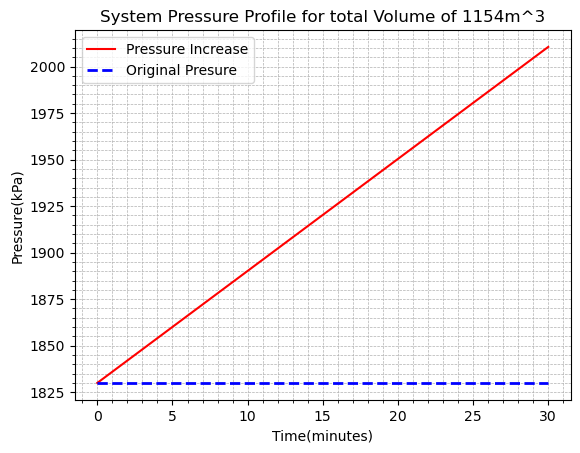

In [67]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt #whenever come to plot must import this

#list conditions
V = 1154 #u.m3
R = 8.314 #u.J/mol.K
T = 120 #u.degreeCelsius
mass_in = 473220 #u.kg/hr
MW_in = 56.6 #u.kg/kmol
mass_out = 28742#u.kg/hr
MW_out = 40.4 #u.kg/kmol

#change the unit
Tk = T+273.15

mol_in = (mass_in/MW_in)*(1/3600)
mol_out = (mass_out/MW_out)*(1/3600)

#define initial condition
P0 = 1830 #u.kPa

#define the function
def dpdt(P,t):
    dpdt=(mol_in - mol_out)/(V/(R*Tk))
    return dpdt

# create x axis for integration
# time to response is 20minutes

start = 0
end = 30
t = np.linspace(start,end,end)
Pinitial = np.linspace(P0,P0,end)

#integration of differential eq.
P = sc.integrate.odeint(dpdt,P0,t)

#start to plot
plt.figure()
plt.plot(t,P,'r',label = 'Pressure Increase')
plt.plot(t,Pinitial,'b--',label='Original Presure',linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V}m^3')
plt.xlabel('Time(minutes)')
plt.ylabel('Pressure(kPa)')
plt.grid(True, which='both',linestyle='--',linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

#always standardize the function name
#make sure import whatever u need to done

In [ ]:
Modeling a Zombie Apocalypse

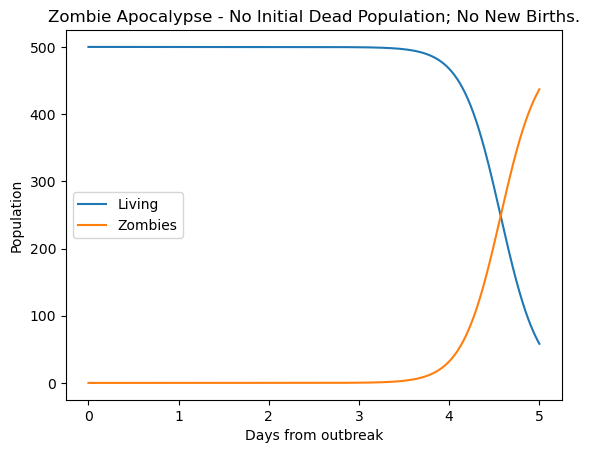

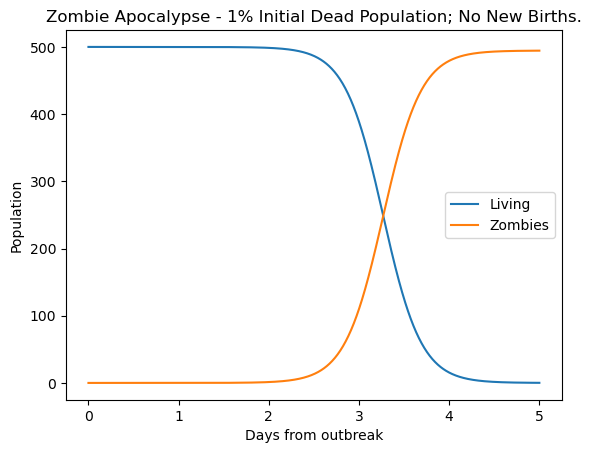

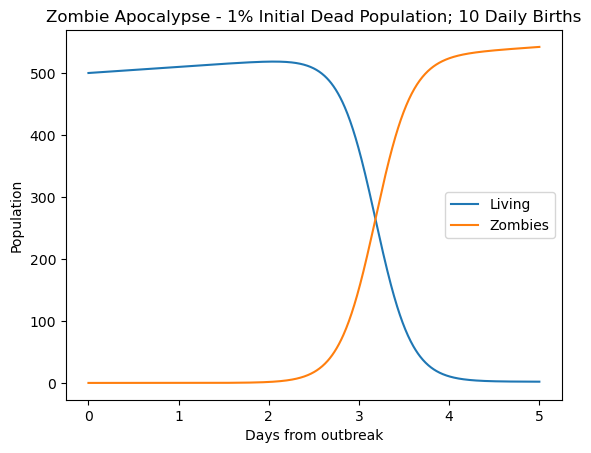

In [8]:
import numpy as np
from scipy.integrate import odeint #import ode integration
import matplotlib.pyplot as plt #import when need to plot graph

#Lists conditions
P = 0  # Birth rate
d = 0.0001  # Natural death percent 
B = 0.0095  # Transmission percent
G = 0.0001  # Resurrect percent 
A = 0.0001  # Destroy percent

# The system of differential equations: y is the vector of populations, t is time
def f(y, t):
    Si = y[0]  # Living population
    Zi = y[1]  # Zombie population
    Ri = y[2]  # Dead population
    # Rates of change of population
    f0 = P - B * Si * Zi - d * Si  # Rate of change of living
    f1 = B * Si * Zi + G * Ri - A * Si * Zi  # Rate of change of zombies
    f2 = d * Si + A * Si * Zi - G * Ri  # Rate of change of dead
    return [f0, f1, f2]

# Initial conditions #0 means initial
S0 = 500.0  # Initial population of living
Z0 = 0      # Initial zombie population
R0 = 0      # Initial dead population
y0 = [S0, Z0, R0]  # Vector of initial conditions
t = np.linspace(0, 5, 1000)  # Time grid for the simulation (0 to 5 days, 1000 points)


# Solving the differential equations over time t, starting from initial conditions y0
soln = odeint(f, y0, t)
S = soln[:, 0]  # Extracting the solution for living
Z = soln[:, 1]  # Extracting the solution for zombies
R = soln[:, 2]  # Extracting the solution for dead

# Plot the graph
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Changing the initial conditions: 1% initial dead population
R0 = 0.01 * S0  # 1% of the initial population is dead
y0 = [S0, Z0, R0]  # Updating the initial conditions
soln = odeint(f, y0, t)  # Solving the DEs again with new initial conditions
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plot the graph
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Updating the parameters for the third scenario with daily births
P = 10  # 10 new births daily
y0 = [S0, Z0, R0]  # Initial conditions remain the same as the second scenario
soln = odeint(f, y0, t)  # Solving the DEs with the new birth rate
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plot the grpah
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()
